In [22]:
%load_ext autoreload
%autoreload 2
import os
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from tqdm import tqdm
import pandas as pd
import pickle as pkl
import notebook_helper
results_dir = '../results/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Load the results into a pandas dataframe

In [23]:
dir_names = sorted([fname
                    for fname in os.listdir(results_dir)
                    if os.path.isdir(join(results_dir, fname))
                    and os.path.exists(join(results_dir, fname, 'results.pkl'))
                    ])
results_list = []
for dir_name in tqdm(dir_names):
    ser = pd.Series(
        pkl.load(open(join(results_dir, dir_name, 'results.pkl'), "rb")))
    results_list.append(ser)

r = pd.concat(results_list, axis=1).T.infer_objects()
r.to_pickle(join(results_dir, 'results_aggregated.pkl'))

100%|██████████| 9/9 [00:00<00:00, 3965.62it/s]


In [24]:
r

,dataset_name,subsample_frac,seed,save_dir,model_name,alpha,max_depth,use_cache,save_dir_unique,accuracy_train,accuracy_cv,accuracy_test
0,rotten_tomatoes,1.0,2,/home/chansingh/cookiecutter-ml-research/results,decision_tree,1.0,2,0,/home/chansingh/cookiecutter-ml-research/resul...,0.565879,0.563766,0.551595
1,rotten_tomatoes,1.0,1,/home/chansingh/cookiecutter-ml-research/results,decision_tree,1.0,2,0,/home/chansingh/cookiecutter-ml-research/resul...,0.566054,0.554529,0.558161
2,rotten_tomatoes,1.0,2,/home/chansingh/cookiecutter-ml-research/results,ridge,0.1,2,0,/home/chansingh/cookiecutter-ml-research/resul...,1.000000,0.686679,0.656660
3,rotten_tomatoes,1.0,1,/home/chansingh/cookiecutter-ml-research/results,ridge,0.1,2,0,/home/chansingh/cookiecutter-ml-research/resul...,1.000000,0.675311,0.684803
4,rotten_tomatoes,1.0,2,/home/chansingh/cookiecutter-ml-research/results,ridge,1.0,2,0,/home/chansingh/cookiecutter-ml-research/resul...,0.998250,0.725044,0.712946
5,rotten_tomatoes,1.0,1,/home/chansingh/cookiecutter-ml-research/results,ridge,1.0,2,0,/home/chansingh/cookiecutter-ml-research/resul...,0.998250,0.727176,0.725141
6,rotten_tomatoes,0.1,1,results,decision_tree,1.0,2,0,results/df9fad423b673921d74f03314189b00c5f44a6...,1.000000,1.000000,0.500000
7,rotten_tomatoes,1.0,2,/home/chansingh/cookiecutter-ml-research/results,decision_tree,1.0,3,0,/home/chansingh/cookiecutter-ml-research/resul...,0.572003,0.569805,0.557223
8,rotten_tomatoes,1.0,1,/home/chansingh/cookiecutter-ml-research/results,decision_tree,1.0,3,0,/home/chansingh/cookiecutter-ml-research/resul...,0.574803,0.564121,0.557223


In [25]:
# group using these keys when averaging over random seeds
group_keys = [k for k in notebook_helper.get_main_args_list(fname='01_train_model.py') if not k == 'seed']
ravg = (
    r
    .groupby(by=group_keys)
    .mean()
    .reset_index()
)
ravg

/tmp/ipykernel_2393272/3066088654.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  r


,dataset_name,subsample_frac,save_dir,model_name,alpha,max_depth,seed,use_cache,accuracy_train,accuracy_cv,accuracy_test
0,rotten_tomatoes,0.1,results,decision_tree,1.0,2,1.0,0.0,1.000000,1.000000,0.500000
1,rotten_tomatoes,1.0,/home/chansingh/cookiecutter-ml-research/results,decision_tree,1.0,2,1.5,0.0,0.565967,0.559147,0.554878
2,rotten_tomatoes,1.0,/home/chansingh/cookiecutter-ml-research/results,decision_tree,1.0,3,1.5,0.0,0.573403,0.566963,0.557223
3,rotten_tomatoes,1.0,/home/chansingh/cookiecutter-ml-research/results,ridge,0.1,2,1.5,0.0,1.000000,0.680995,0.670732
4,rotten_tomatoes,1.0,/home/chansingh/cookiecutter-ml-research/results,ridge,1.0,2,1.5,0.0,0.998250,0.726110,0.719043


In [26]:
# apply cross validation
(
    ravg
    .sort_values(by='accuracy_cv', ascending=False)
    .groupby(by=['model_name', 'dataset_name'])
    .first()
)

,,subsample_frac,save_dir,alpha,max_depth,seed,use_cache,accuracy_train,accuracy_cv,accuracy_test
model_name,dataset_name,,,,,,,,,
decision_tree,rotten_tomatoes,0.1,results,1.0,2,1.0,0.0,1.00000,1.00000,0.500000
ridge,rotten_tomatoes,1.0,/home/chansingh/cookiecutter-ml-research/results,1.0,2,1.5,0.0,0.99825,0.72611,0.719043


/home/chansingh/.embgam/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


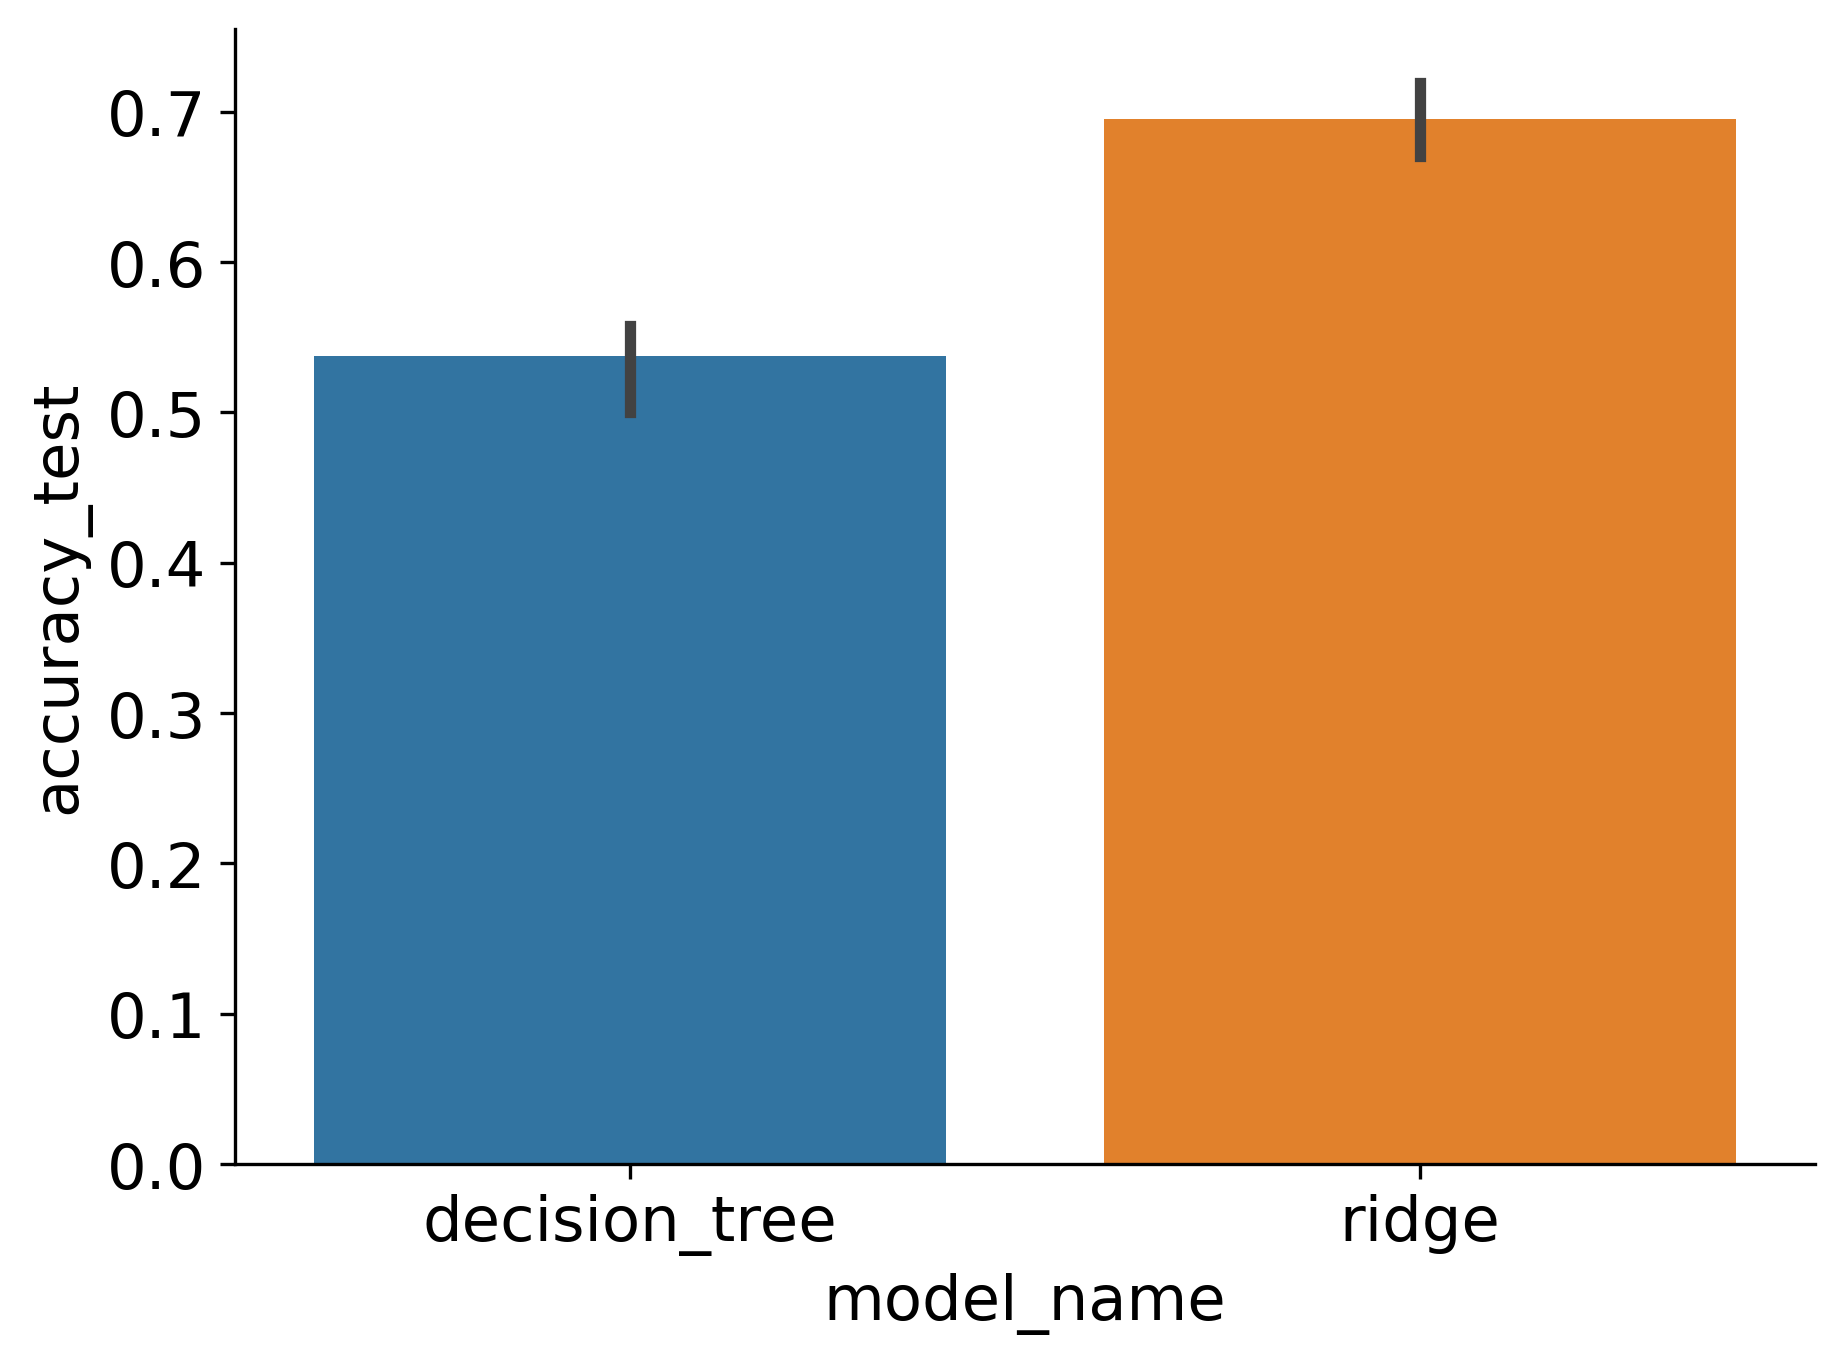

In [27]:
sns.barplot(data=ravg, x='model_name', y='accuracy_test') #, hue='dataset_name')
plt.show()

Load an individual model

In [28]:
run_args = r.iloc[0]
model = pkl.load(open(join(run_args.save_dir_unique, 'model.pkl'), 'rb'))
model

DecisionTreeClassifier(max_depth=2)